In [1]:
from transformers import AutoImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/dpt-dinov2-giant-nyu")
model = DPTForDepthEstimation.from_pretrained("facebook/dpt-dinov2-giant-nyu")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/442 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.80G [00:00<?, ?B/s]

In [3]:
!pip install transformers pillow
from transformers import pipeline
from PIL import Image

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
image = Image.open('/content/specna-arms-Um9WPLvWV_M-unsplash.jpg')
depth = pipe(image)["depth"]


Device set to use cuda:0


Device set to use cuda:0


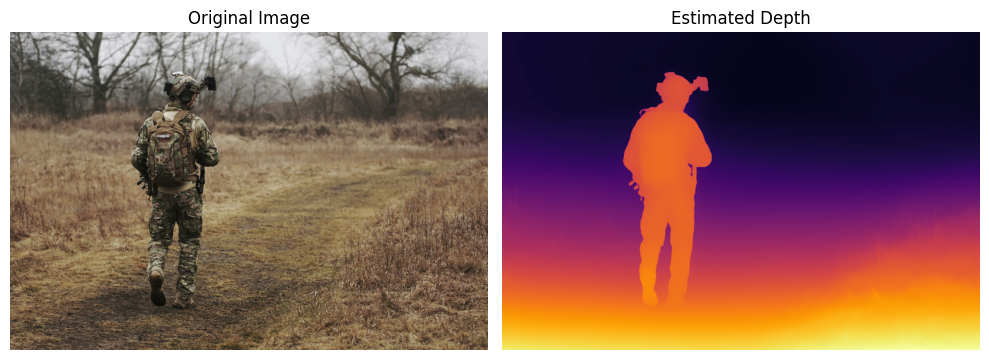

In [4]:
# Install required packages
!pip install transformers pillow matplotlib

# Imports
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# Load input image
image = Image.open('/content/specna-arms-Um9WPLvWV_M-unsplash.jpg')

# Get depth map
output = pipe(image)
depth = output["depth"]  # This is a PIL.Image

# Visualize depth map using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Depth map
plt.subplot(1, 2, 2)
plt.imshow(depth, cmap='inferno')  # Or 'plasma', 'magma', etc.
plt.title("Estimated Depth")
plt.axis("off")

plt.tight_layout()
plt.show()


Device set to use cuda:0


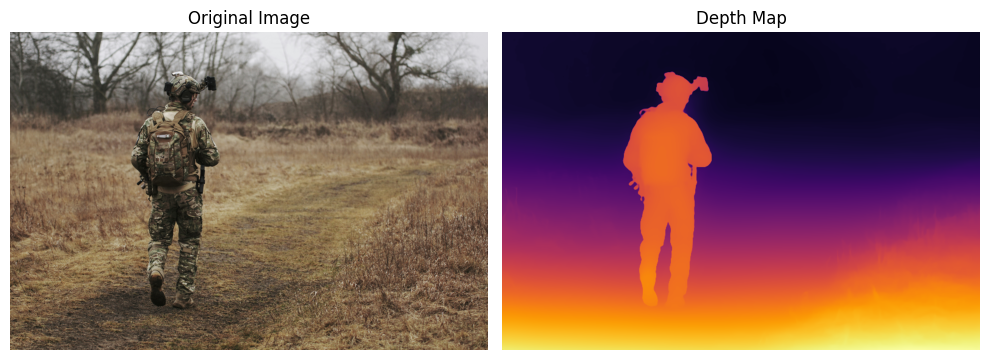

In [5]:
# Install required packages
!pip install transformers pillow matplotlib

from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load the depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# Load your input image
image = Image.open('/content/specna-arms-Um9WPLvWV_M-unsplash.jpg')

# Run the pipeline
output = pipe(image)
depth = output["depth"]  # PIL Image

# Save the depth image
depth.save("depth_map.png")  # You can change the filename/format if needed

# Display images (original and depth)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(depth, cmap='inferno')
plt.title("Depth Map")
plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:

from google.colab import files
files.download("depth_map.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load depth image
depth_img = Image.open("/content/depth_map.png").convert("L")
depth_np = np.array(depth_img).astype(np.float32)

# Normalize depth (simulate real depth in meters)
depth_np = (depth_np / 255.0) * 2.0

# Image dimensions
h, w = depth_np.shape
cx, cy = w / 2, h / 2
fx = fy = 500.0

# Generate 3D point cloud
points = []

for v in range(h):
    for u in range(w):
        Z = depth_np[v, u]
        if Z == 0:
            continue
        X = (u - cx) * Z / fx
        Y = (v - cy) * Z / fy
        points.append([X, -Y, Z])

points = np.array(points)

# Plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='inferno', s=0.5)

ax.set_title("3D Point Cloud from Depth Map")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


KeyboardInterrupt: 

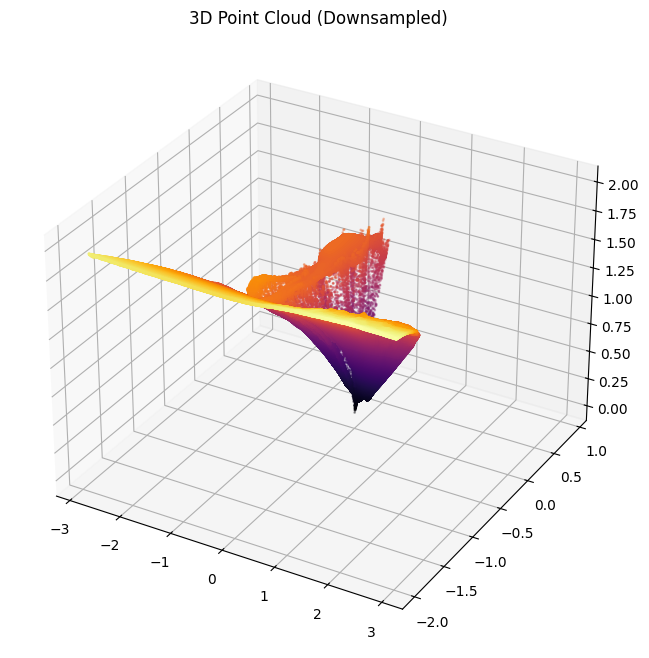

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and downsample the depth map
depth_img = Image.open("/content/depth_map.png").convert("L")
depth_img = depth_img.resize((depth_img.width // 4, depth_img.height // 4))  # Reduce resolution
depth_np = np.array(depth_img).astype(np.float32)
depth_np = (depth_np / 255.0) * 2.0  # Normalize to 0–2m range

# Camera parameters (fake)
h, w = depth_np.shape
cx, cy = w / 2, h / 2
fx = fy = 500.0

# Generate 3D points efficiently
points = []
for v in range(h):
    for u in range(w):
        Z = depth_np[v, u]
        if Z == 0:
            continue
        X = (u - cx) * Z / fx
        Y = (v - cy) * Z / fy
        points.append([X, -Y, Z])

points = np.array(points)

# Plot with matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='inferno', s=1)
ax.set_title("3D Point Cloud (Downsampled)")
plt.show()


In [3]:
from PIL import Image
import numpy as np

# Load depth image and convert to float
depth_img = Image.open("/content/depth_map.png").convert("L")
depth_img = depth_img.resize((depth_img.width // 4, depth_img.height // 4))  # Downsample
depth_np = np.array(depth_img).astype(np.float32)
depth_np = (depth_np / 255.0) * 2.0  # Normalize (0–2 meters)

# Intrinsic approximation
h, w = depth_np.shape
cx, cy = w / 2, h / 2
fx = fy = 500.0

# Compute point cloud
points = []
for v in range(h):
    for u in range(w):
        Z = depth_np[v, u]
        if Z == 0: continue
        X = (u - cx) * Z / fx
        Y = (v - cy) * Z / fy
        points.append([X, -Y, Z])  # Negative Y to make "up" positive

points = np.array(points)

# Filter center region (e.g., central vertical slice)
mask = (np.abs(points[:, 0]) < 0.2)  # Narrow horizontal band
person_points = points[mask]

# Estimate height (difference in Y)
if len(person_points) > 0:
    height = person_points[:, 1].max() - person_points[:, 1].min()
    print(f"Estimated height of object in center: {height:.2f} meters")
else:
    print("No object detected in center region.")


Estimated height of object in center: 2.48 meters
